In [12]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
file_path = f'wpsSimulator.csv'
mental_state_data = pd.read_csv(file_path)

In [7]:
mental_state_data

,HappinessSadness,HopefulUncertainty,SecureInsecure,money,health,timeLeftOnDay,newDay,currentSeason,robberyAccount,purpose,...,seeds,waterAvailable,pesticidesAvailable,totalHarvestedWeight,contractor,daysToWorkForOther,Agent,Emotion,peasantFamilyHelper,haveEmotions
0,0.1458,0.1978,0.4278,2353105.0,100,24.0,True,NONE,0,NaN,...,1074,2074.0,0,0.000000,NONE,0,PeasantFamily_56,True,NONE,False
1,0.1464,0.1984,0.4284,2251850.0,100,24.0,True,NONE,0,NaN,...,1028,2028.0,0,0.000000,NONE,0,PeasantFamily_26,True,NONE,False
2,0.1457,0.1977,0.4277,2194752.0,100,24.0,True,NONE,0,NaN,...,1002,2002.0,0,0.000000,NONE,0,PeasantFamily_143,True,NONE,False
3,0.1460,0.1980,0.4280,2227750.0,100,24.0,True,NONE,0,NaN,...,1017,2017.0,0,0.000000,NONE,0,PeasantFamily_21,True,NONE,False
4,0.1464,0.1984,0.4284,2239356.0,100,24.0,True,NONE,0,NaN,...,1022,2022.0,0,0.000000,NONE,0,PeasantFamily_111,True,NONE,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562403,0.0000,0.0000,0.0000,8310460.0,100,24.0,True,NONE,0,farmer,...,-170,230.0,0,87213.431764,NONE,0,PeasantFamily_58,True,NONE,False
562404,0.3510,0.0000,0.0000,8888837.0,92,24.0,True,NONE,0,farmer,...,-252,1928.0,0,90377.911827,NONE,0,PeasantFamily_102,True,NONE,False
562405,0.3861,0.0000,0.0000,9214269.0,98,24.0,True,NONE,0,farmer,...,-212,1988.0,0,90073.292558,NONE,0,PeasantFamily_76,True,NONE,True
562406,0.9892,0.8679,0.8679,7855392.0,94,24.0,True,NONE,0,farmer,...,-254,1946.0,0,87768.158855,NONE,0,PeasantFamily_52,True,NONE,True


In [8]:
# Separating the data based on the 'haveEmotions' field (True or False)
agents_with_emotions = mental_state_data[mental_state_data['haveEmotions'] == True]
agents_without_emotions = mental_state_data[mental_state_data['haveEmotions'] == False]

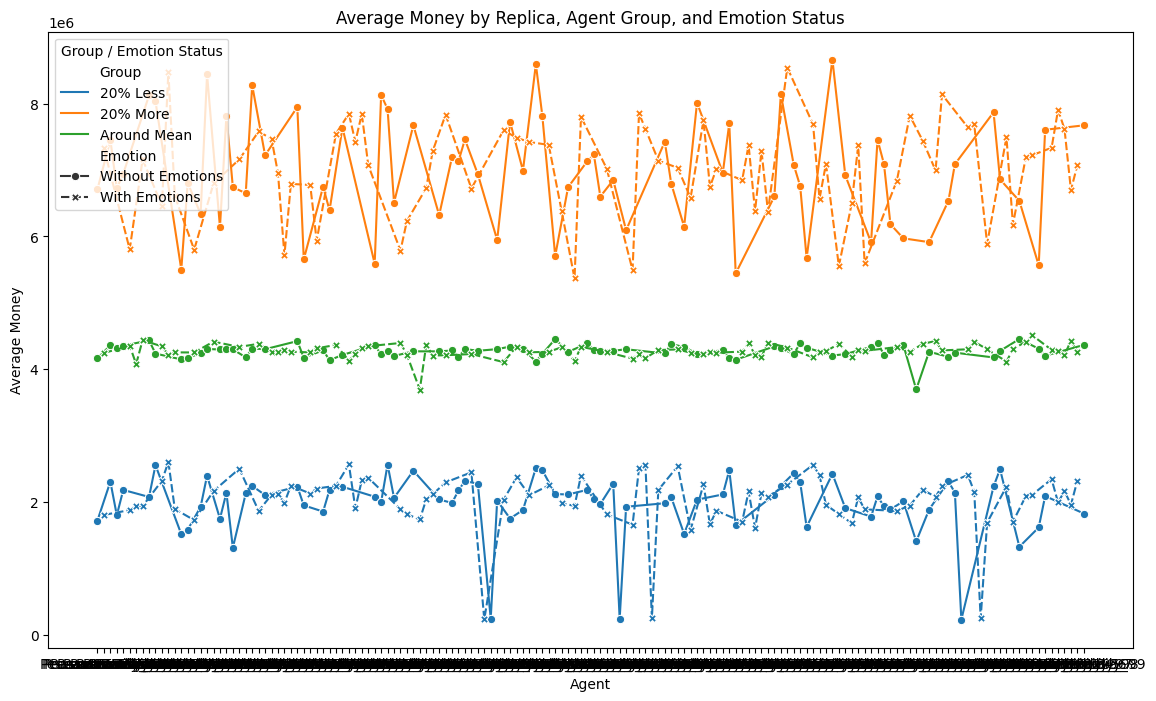

In [10]:
# Calcular el dinero inicial medio
initial_money_mean = pd.concat([agents_with_emotions, agents_without_emotions])['money'].mean()

# Calcular los umbrales para el 20% más y menos
upper_threshold = initial_money_mean * 1.2
lower_threshold = initial_money_mean * 0.8

# Función para clasificar a los agentes basada en su dinero inicial
def classify_agent(row):
    if row['money'] <= lower_threshold:
        return '20% Less'
    elif row['money'] >= upper_threshold:
        return '20% More'
    else:
        return 'Around Mean'

# Crear copias independientes de los DataFrames originales
agents_with_emotions_copy = agents_with_emotions.copy()
agents_without_emotions_copy = agents_without_emotions.copy()

# Aplicar la clasificación y añadir la columna para emociones
agents_with_emotions_copy['Group'] = agents_with_emotions_copy.apply(classify_agent, axis=1)
agents_with_emotions_copy['Emotion'] = 'With Emotions'
agents_without_emotions_copy['Group'] = agents_without_emotions_copy.apply(classify_agent, axis=1)
agents_without_emotions_copy['Emotion'] = 'Without Emotions'

# Combinar las copias de los DataFrames
combined_agents = pd.concat([agents_with_emotions_copy, agents_without_emotions_copy])

# Agrupar por 'Replica', 'Agent', 'Group', 'Emotion', y calcular la media de 'money'
avg_money = combined_agents.groupby(['Agent', 'Group', 'Emotion'])['money'].mean().reset_index()

# Crear el gráfico de líneas para el promedio de dinero
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_money, x='Agent', y='money', hue='Group', style='Emotion', markers=True)
plt.title('Average Money by Replica, Agent Group, and Emotion Status')
plt.xlabel('Agent')
plt.ylabel('Average Money')
plt.legend(title='Group / Emotion Status')
plt.show()

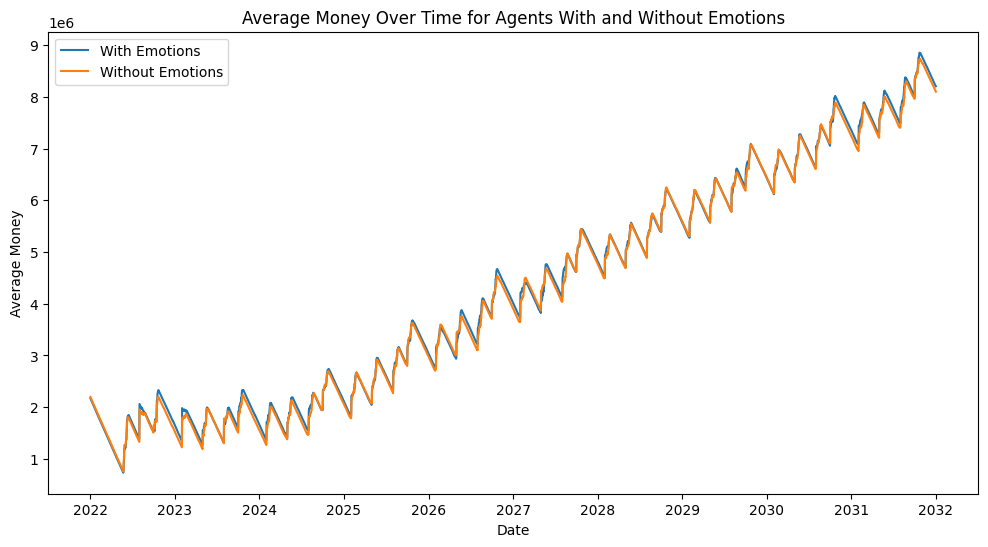

In [11]:
# Creating explicit copies of the dataframes to avoid SettingWithCopyWarning
agents_with_emotions_copy = agents_with_emotions.copy()
agents_without_emotions_copy = agents_without_emotions.copy()

# Parsing the 'internalCurrentDate' column with the correct format in the copies
agents_with_emotions_copy['internalCurrentDate'] = pd.to_datetime(agents_with_emotions_copy['internalCurrentDate'], format='%d/%m/%Y')
agents_without_emotions_copy['internalCurrentDate'] = pd.to_datetime(agents_without_emotions_copy['internalCurrentDate'], format='%d/%m/%Y')

# Grouping data by date and calculating the mean 'money' value for each date in the copies
avg_money_with_emotions = agents_with_emotions_copy.groupby('internalCurrentDate')['money'].mean()
avg_money_without_emotions = agents_without_emotions_copy.groupby('internalCurrentDate')['money'].mean()

# Re-plotting the average money over time for both datasets
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_money_with_emotions, label='With Emotions')
sns.lineplot(data=avg_money_without_emotions, label='Without Emotions')
plt.title('Average Money Over Time for Agents With and Without Emotions')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend()
plt.show()

In [13]:
# Asegurarse de que los tipos de datos son los correctos
mental_state_data['haveEmotions'] = mental_state_data['haveEmotions'].astype(bool)
mental_state_data['money'] = mental_state_data['money'].astype(float)

# Separar los datos en grupos
group_with_emotions = mental_state_data[mental_state_data['haveEmotions']]['money']
group_without_emotions = mental_state_data[~mental_state_data['haveEmotions']]['money']

# Realizar ANOVA
anova_result = f_oneway(group_with_emotions, group_without_emotions)
print(anova_result)

F_onewayResult(statistic=34.06134423118509, pvalue=5.343080823216254e-09)


/tmp/ipykernel_259967/2512572015.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_data['internalCurrentDate'] = pd.to_datetime(mental_state_data['internalCurrentDate'], format='%d/%m/%Y')
/tmp/ipykernel_259967/2512572015.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_data['internalCurrentDate'] = pd.to_datetime(mental_state_data['internalCurrentDate'], format='%d/%m/%Y')
/tmp/ipykernel_259967/2512572015.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

KeyboardInterrupt: 

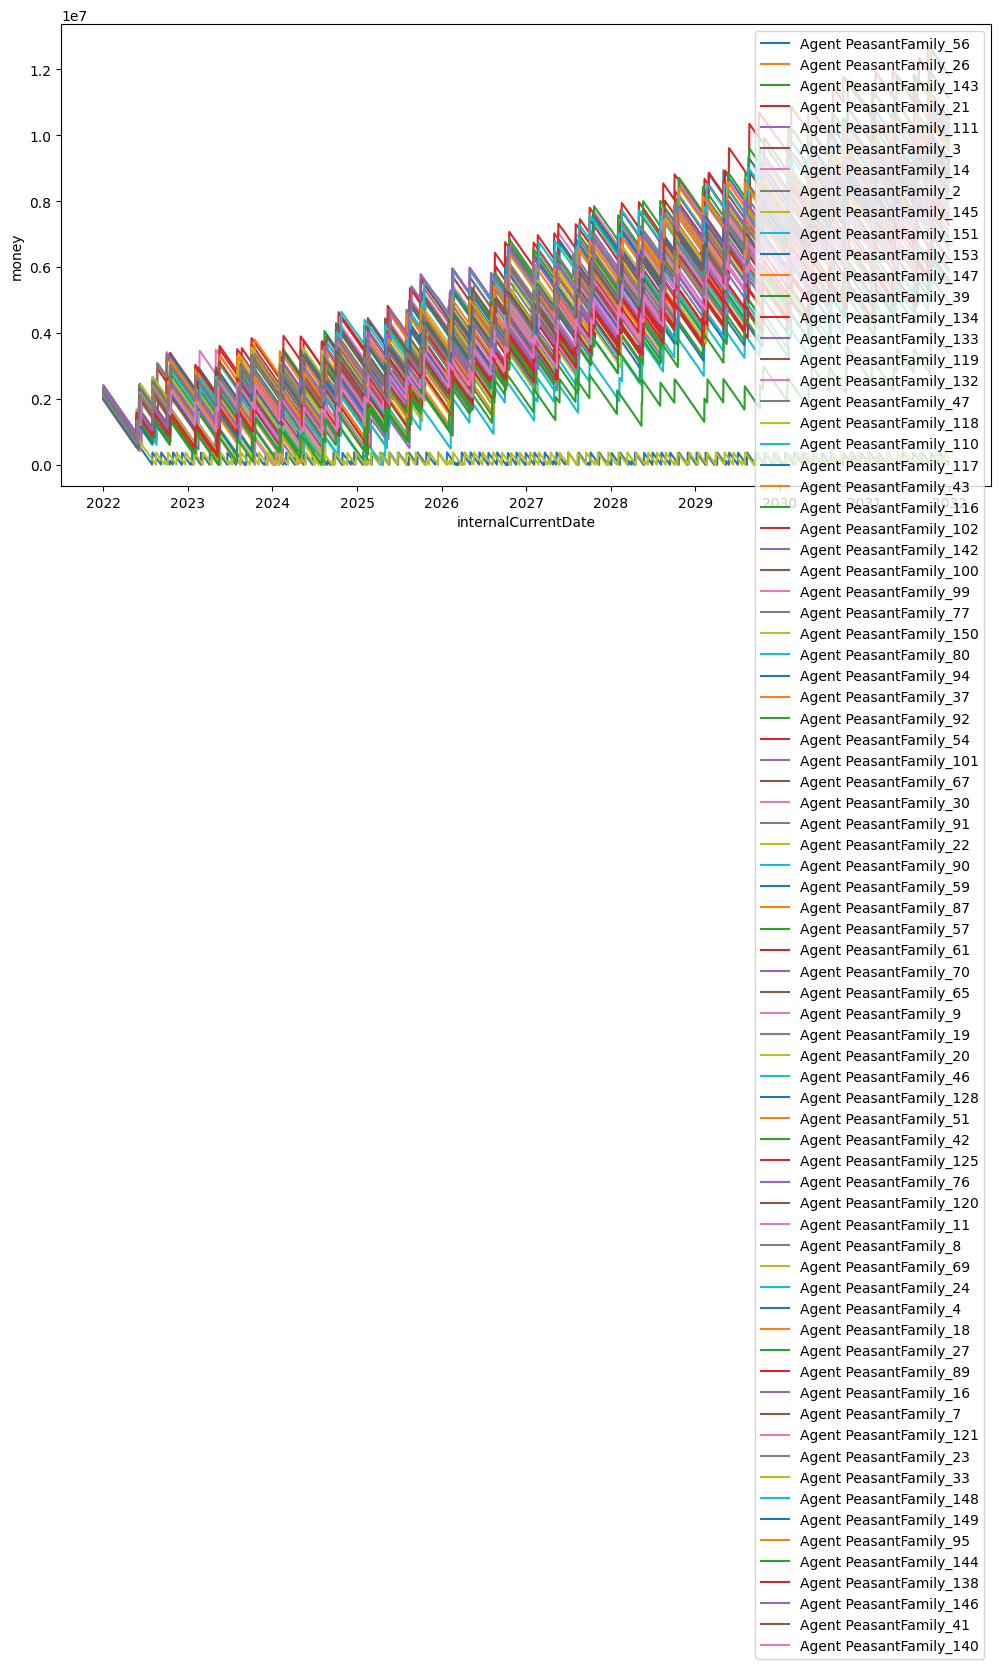

In [14]:
# Create a list of unique agents
unique_agents = mental_state_data['Agent'].unique()

# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate through each unique agent and plot their behavior
for agent in unique_agents:
    agent_data = mental_state_data[mental_state_data['Agent'] == agent]
    
    # Parse the date column if needed
    agent_data['internalCurrentDate'] = pd.to_datetime(mental_state_data['internalCurrentDate'], format='%d/%m/%Y')
    
    # Group by date and calculate the mean 'money' value for each date
    avg_money = agent_data.groupby('internalCurrentDate')['money'].mean()
    
    # Plot the agent's behavior
    sns.lineplot(data=avg_money, label=f'Agent {agent}')
    
# Customize the plot
plt.title('Average Money Over Time for Each Agent')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend()
plt.show()


/tmp/ipykernel_259967/3232917923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_data['internalCurrentDate'] = pd.to_datetime(agent_data['internalCurrentDate'], format='%d/%m/%Y')
/tmp/ipykernel_259967/3232917923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_data['internalCurrentDate'] = pd.to_datetime(agent_data['internalCurrentDate'], format='%d/%m/%Y')
/tmp/ipykernel_259967/3232917923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

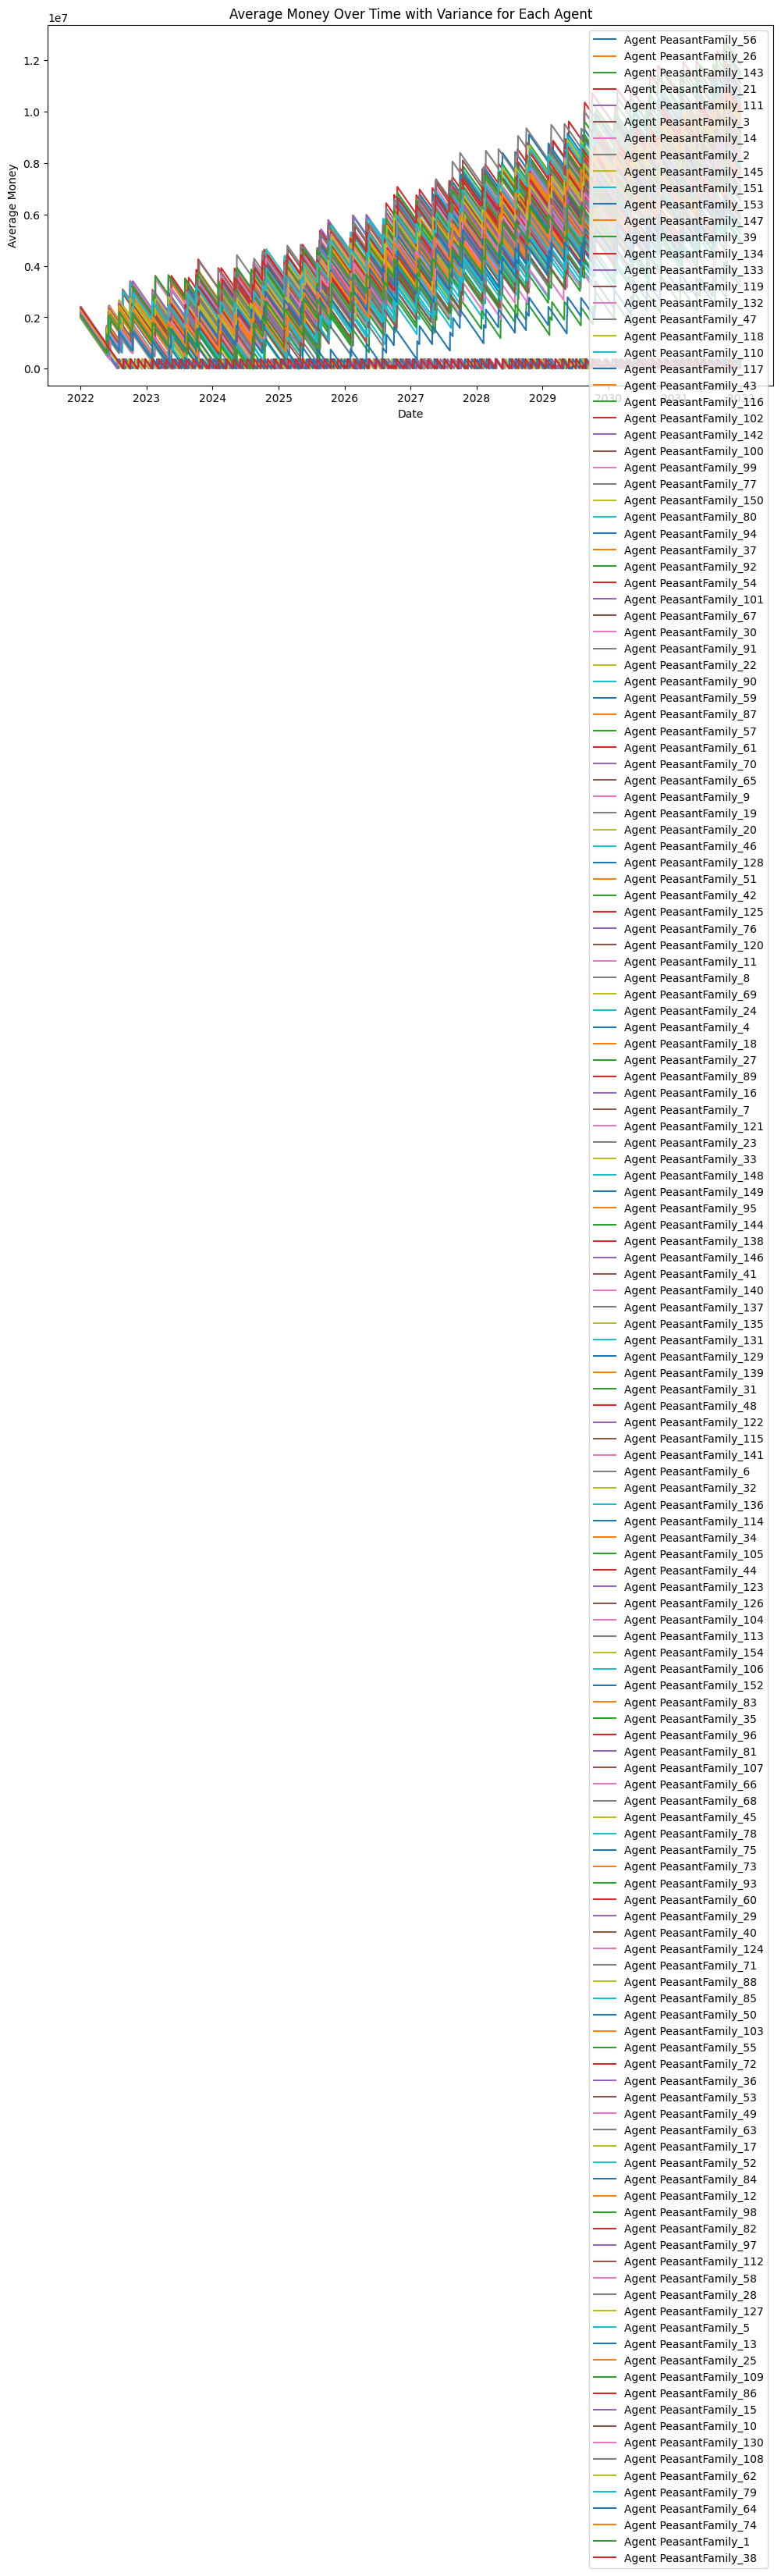

In [16]:
# Create a list of unique agents
unique_agents = mental_state_data['Agent'].unique()
agents_data = mental_state_data.copy()

# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate through each unique agent and plot their behavior
for agent in unique_agents:
    agent_data = agents_data[agents_data['Agent'] == agent]
    
    # Parse the date column if needed
    agent_data['internalCurrentDate'] = pd.to_datetime(agent_data['internalCurrentDate'], format='%d/%m/%Y')
    
    # Group by date and calculate the mean 'money' value for each date
    avg_money = agent_data.groupby('internalCurrentDate')['money'].mean()
    
    # Calculate the variance
    variance = agent_data.groupby('internalCurrentDate')['money'].var()
    
    # Plot the agent's behavior
    sns.lineplot(data=avg_money, label=f'Agent {agent}')
    
    # Shade the area representing the variance
    plt.fill_between(avg_money.index, avg_money - variance, avg_money + variance, alpha=0.3)

# Customize the plot
plt.title('Average Money Over Time with Variance for Each Agent')
plt.xlabel('Date')
plt.ylabel('Average Money')
plt.legend()
plt.show()